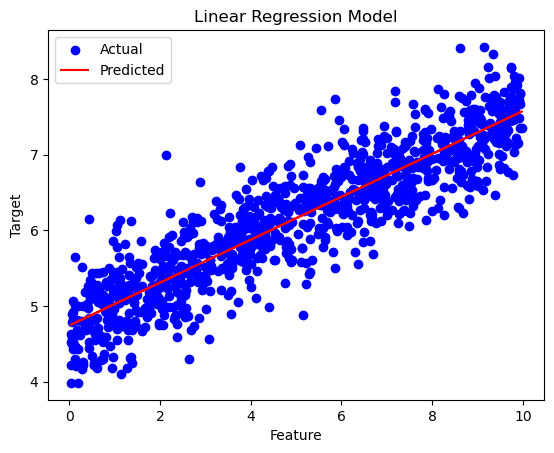

Mean Squared Error: 15.64513462225336
Mean Absolute Error: 3.851919096824402
R² Score: -79.54369257492925


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Read datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Define features and target variable
X_train = train_df[['feature']]
y_train = train_df['target']

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training data
train_predictions = model.predict(X_train)

# Plot the training data and regression line
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, train_predictions, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

# Make predictions on the test data
X_test = test_df[['feature']]
test_df['prediction'] = model.predict(X_test)

# Create submission file in the required format
submission_df = sample_submission.copy()
submission_df['prediction'] = test_df['prediction']
submission_df.to_csv('predictions.csv', index=False)

# Evaluate the model
mse = mean_squared_error(sample_submission['prediction'], submission_df['prediction'])
mae = mean_absolute_error(sample_submission['prediction'], submission_df['prediction'])
r2 = r2_score(sample_submission['prediction'], submission_df['prediction'])

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')
